# 1. Data

In [69]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math
from collections import defaultdict



# Load all the uploaded files into a dictionary
file_paths = {
    "Alvarez_transfer": "reddits/Alvarez_transfer.csv",
    "Deligt_transfer": "reddits/Deligt_transfer.csv",
    "Diaby_transfer": "reddits/Diaby_transfer.csv",
    "DL_transfer": "reddits/DL_transfer.csv",
    "Mbappe_transfer": "reddits/Mbappe_transfer.csv",
    "Olmo_transfer": "reddits/Olmo_transfer.csv",
    "Pedro_transfer": "reddits/Pedro_transfer.csv",
    "Solanke_transfer": "reddits/Solanke_transfer.csv",
    "Yoro_transfer": "reddits/Yoro_transfer.csv"
}

# Read the files into a dictionary of dataframes
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}


# 2. TF-IDF

In [70]:
# # Define a function to compute TF-IDF for the comments column and create word clouds
# def process_tfidf_and_wordclouds(dataframes):
#     tfidf_results = {}
#     for name, df in dataframes.items():
#         # Extract the 'comments' column
#         comments = df['comments'].fillna('')  # Handle missing comments
#         if comments.empty:
#             print(f"No comments available for {name}. Skipping.")
#             continue

#         # Initialize TfidfVectorizer
#         vectorizer = TfidfVectorizer(stop_words='english', max_features=100)  # Limiting to top 100 words for clarity
#         tfidf_matrix = vectorizer.fit_transform(comments)
#         feature_names = vectorizer.get_feature_names_out()

#         # Store the results
#         tfidf_results[name] = {
#             'matrix': tfidf_matrix,
#             'features': feature_names
#         }

#         # Create and display the word cloud for the comments
#         wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(comments))
#         plt.figure(figsize=(10, 5))
#         plt.imshow(wordcloud, interpolation='bilinear')
#         plt.axis('off')
#         plt.title(f"Word Cloud for {name}")
#         plt.show()

#     return tfidf_results

# # Process the TF-IDF and generate word clouds
# tfidf_results = process_tfidf_and_wordclouds(dataframes)


In [71]:
# def calculate_tfidf_and_output(dataframes, ignore_words=None, top_n=10):
#     tfidf_output = {}

#     for name, df in dataframes.items():
#         # Combine all comments into a single document for the player
#         combined_comments = ' '.join(df['comments'].fillna(''))

#         if not combined_comments.strip():
#             print(f"No valid comments available for {name}. Skipping.")
#             continue

#         # Tokenize and calculate term frequencies (TF)
#         tf = defaultdict(int)  # term frequency
#         for word in combined_comments.split():
#             tf[word.lower()] += 1

#         # Calculate document frequency (DF)
#         unique_words = set(tf.keys())
#         df_count = defaultdict(int)  # In this context, all words appear in one document
#         for word in unique_words:
#             df_count[word] = 1

#         # Calculate IDF (since it's only one "document," IDF is static)
#         N = 1  # Total number of documents (1 combined document per dataset)
#         idf = {word: math.log(N / (df_count[word] + 1)) for word in df_count}

#         # Calculate TF-IDF
#         tfidf_scores = []
#         for word, count in tf.items():
#             tf_adjusted = 1 + math.log(count) if count > 0 else 0
#             tfidf = tf_adjusted * idf[word]
#             tfidf_scores.append((word, tfidf))

#         # Sort words by TF-IDF score
#         tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
        
#         # Store the top N words
#         tfidf_output[name] = tfidf_scores[:top_n]

#         # Print top N TF-IDF words for the player
#         print(f"\nTop {top_n} TF-IDF words for {name}:")
#         for word, score in tfidf_output[name]:
#             print(f"{word}: {score:.4f}")

#         # Generate word cloud excluding ignored words
#         if ignore_words:
#             for word in ignore_words:
#                 combined_comments = combined_comments.replace(word, '')
#         wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_comments)
#         plt.figure(figsize=(10, 5))
#         plt.imshow(wordcloud, interpolation='bilinear')
#         plt.axis('off')
#         plt.title(f"Word Cloud for {name} (ignoring words: {ignore_words})")
#         plt.show()

#     return tfidf_output

# # Example usage
# ignore_words = ["the", "and", "of", "to", "a", "in"]  # Words to exclude
# tfidf_output = calculate_tfidf_and_output(dataframes, ignore_words=ignore_words, top_n=10)


In [72]:
# # Define the lists of words
# transfer_related_words = [
#     "star", "talented", "exceptional", "promising", "rising", "skilled", 
#     "proven", "versatile", "strong", "reliable", "world-class", "elite", 
#     "experienced", "dynamic", "clutch", "outstanding", "fit", "bargain", 
#     "steal", "genius", "value", "flop", "overrated", "risky", "gamble", 
#     "injury-prone", "washed", "overpriced", "liability", "inconsistent", 
#     "slow", "weak", "unfit", "bust", "disappointment", "problem", "poor", 
#     "outdated", "fraud", "disaster", "waste", "exciting", "shocking", 
#     "controversial", "surprising", "heartbreaking", "frustrating", "thrilling",
#     "emotional", "dramatic", "unbelievable", "disgraceful", "insane", 
#     "ridiculous", "crazy", "unexpected", "massive", "bold", "questionable",
#     "regretful", "heated"
# ]

# comprehensive_ignore_words = [
#     "the", "a", "an", "and", "but", "or", "nor", "for", "yet", "so", 
#     "in", "on", "at", "by", "with", "about", "against", "between", "into", 
#     "through", "during", "before", "after", "over", "under", "to", "from", 
#     "up", "down", "out", "off", "of", "like", "i", "you", "he", "she", 
#     "it", "we", "they", "me", "him", "her", "us", "them", "my", "your", 
#     "his", "its", "our", "their", "mine", "yours", "hers", "theirs", "is", 
#     "was", "are", "were", "will", "would", "should", "could", "has", 
#     "have", "had", "do", "does", "did", "can", "may", "might", "am", "be", 
#     "being", "been", "if", "then", "there", "here", "this", "that", "these", 
#     "those", "such", "as", "not", "very", "much", "many", "some", "any", 
#     "few", "more", "most", "all", "just", "only", "now", "well", "even", 
#     "though", "also", "back", "season" "players", "massive", "player"
# ]

# # Updated Function
# def calculate_tfidf_and_output_with_filters(dataframes, ignore_words=None, top_n=10):
#     tfidf_output = {}

#     # Combine ignore_words with comprehensive_ignore_words
#     ignore_words = set(ignore_words or []).union(comprehensive_ignore_words)

#     for name, df in dataframes.items():
#         # Combine all comments into a single document for the player
#         combined_comments = ' '.join(df['comments'].fillna('')).lower()

#         if not combined_comments.strip():
#             print(f"No valid comments available for {name}. Skipping.")
#             continue

#         # Remove ignored words from the combined comments
#         filtered_comments = ' '.join(
#             word for word in combined_comments.split() if word not in ignore_words
#         )

#         # Use TfidfVectorizer to calculate TF-IDF
#         vectorizer = TfidfVectorizer(stop_words='english')
#         tfidf_matrix = vectorizer.fit_transform([filtered_comments])  # Treat as a single document
#         feature_names = vectorizer.get_feature_names_out()
#         tfidf_scores = {feature_names[i]: tfidf_matrix[0, i] for i in range(len(feature_names))}

#         # Sort by TF-IDF score
#         sorted_tfidf = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)
        
#         # Store the top N words
#         tfidf_output[name] = sorted_tfidf[:top_n]

#         # Print top N TF-IDF words for the player
#         print(f"\nTop {top_n} TF-IDF words for {name}:")
#         for word, score in tfidf_output[name]:
#             print(f"{word}: {score:.4f}")

#         # Generate word cloud excluding ignored words and non-transfer-related words
#         wordcloud_text = ' '.join(
#             word for word in filtered_comments.split() if word in transfer_related_words
#         )
#         wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
#         plt.figure(figsize=(10, 5))
#         plt.imshow(wordcloud, interpolation='bilinear')
#         plt.axis('off')
#         plt.title(f"Word Cloud for {name} (Transfer-Related Words Only)")
#         plt.show()

#     return tfidf_output

# # Example usage
# tfidf_output = calculate_tfidf_and_output_with_filters(dataframes, ignore_words=[], top_n=10)



Top 10 TF-IDF words for Alvarez_transfer:
crazy: 0.5019
value: 0.3843
fit: 0.3294
insane: 0.2823
proven: 0.2353
flop: 0.2196
problem: 0.2196
ridiculous: 0.2039
poor: 0.1882
massive: 0.1882


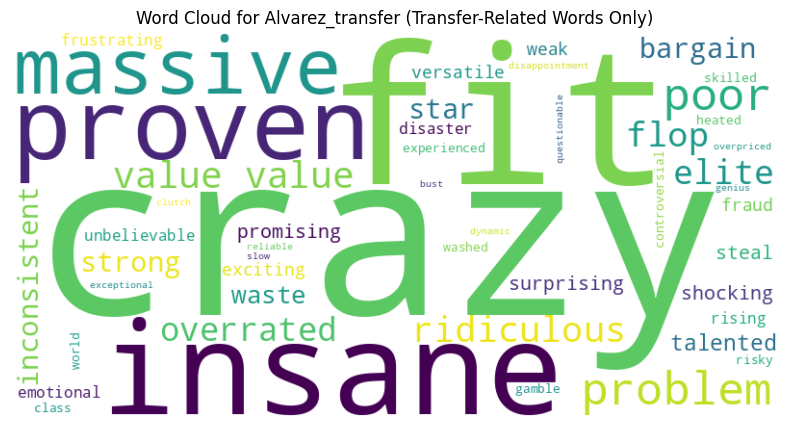


Top 10 TF-IDF words for Deligt_transfer:
fit: 0.4620
problem: 0.4123
poor: 0.3427
value: 0.2980
crazy: 0.2782
massive: 0.2384
insane: 0.2285
ridiculous: 0.2086
slow: 0.1639
controversial: 0.1540


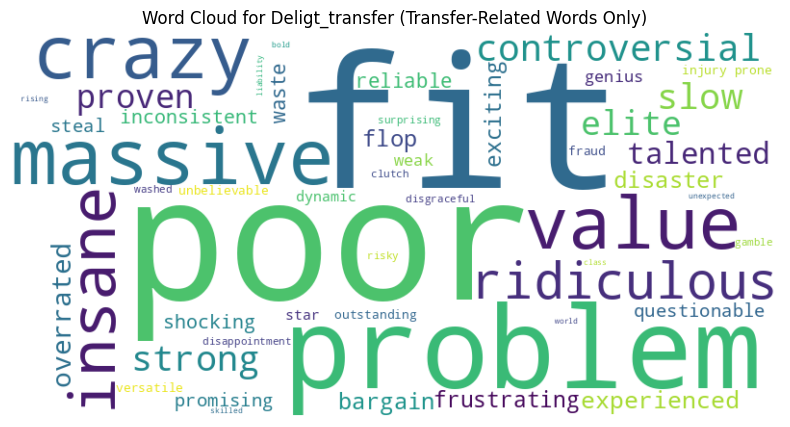


Top 10 TF-IDF words for Diaby_transfer:
star: 0.4527
inconsistent: 0.3621
weak: 0.3621
crazy: 0.3621
strong: 0.2716
value: 0.2716
massive: 0.2716
talented: 0.1811
fit: 0.1811
insane: 0.1811


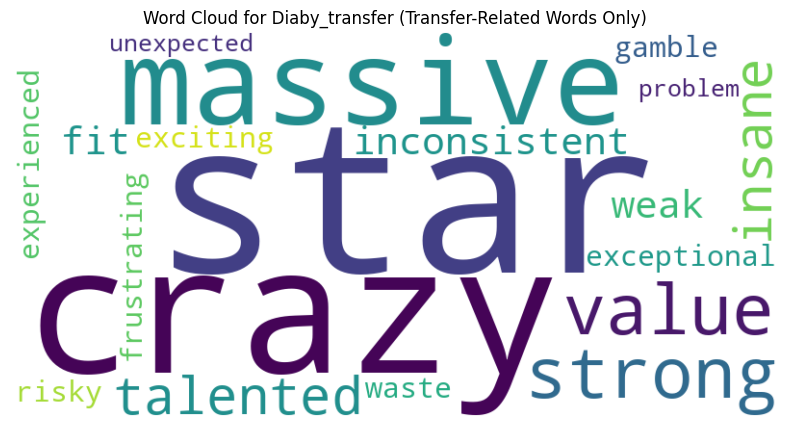


Top 10 TF-IDF words for DL_transfer:
value: 0.8744
poor: 0.2222
problem: 0.1792
massive: 0.1649
ridiculous: 0.1362
crazy: 0.1290
fit: 0.1218
overrated: 0.1075
insane: 0.1075
elite: 0.0932


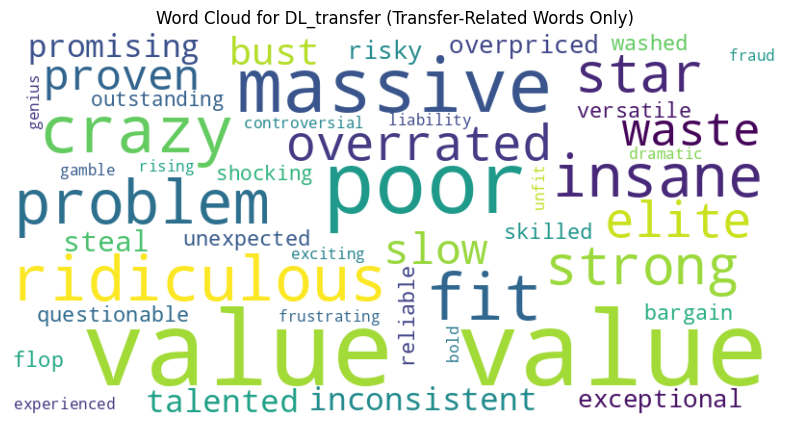


Top 10 TF-IDF words for Mbappe_transfer:
value: 0.7460
overrated: 0.3651
insane: 0.3016
crazy: 0.3016
star: 0.1429
fit: 0.1429
massive: 0.1429
ridiculous: 0.1270
poor: 0.1111
controversial: 0.0952


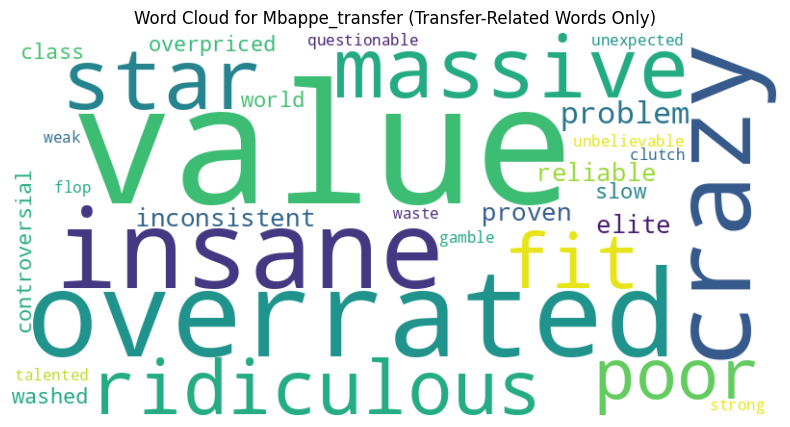


Top 10 TF-IDF words for Olmo_transfer:
value: 0.7559
fit: 0.3489
problem: 0.3198
crazy: 0.2617
promising: 0.1744
insane: 0.1744
gamble: 0.1163
star: 0.0872
talented: 0.0872
strong: 0.0872


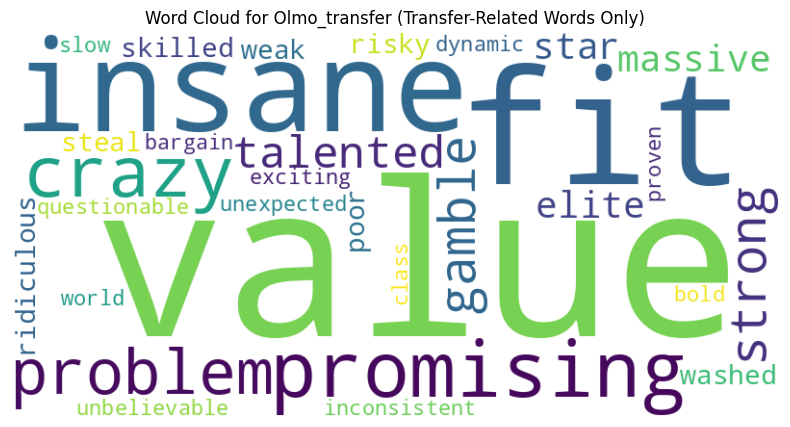


Top 10 TF-IDF words for Pedro_transfer:
fit: 0.5089
poor: 0.3969
value: 0.3410
problem: 0.3053
massive: 0.2799
insane: 0.2595
crazy: 0.2392
ridiculous: 0.1934
talented: 0.1425
strong: 0.1425


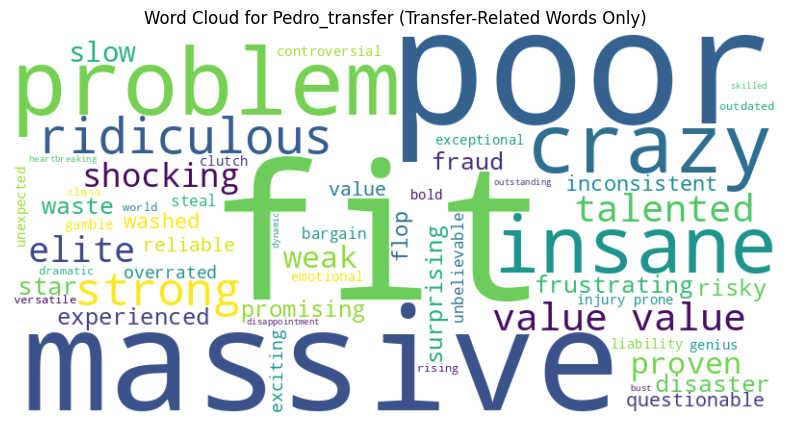


Top 10 TF-IDF words for Solanke_transfer:
proven: 0.7757
fit: 0.5406
value: 0.1410
strong: 0.1175
problem: 0.0940
poor: 0.0940
rising: 0.0705
gamble: 0.0705
overpriced: 0.0705
weak: 0.0705


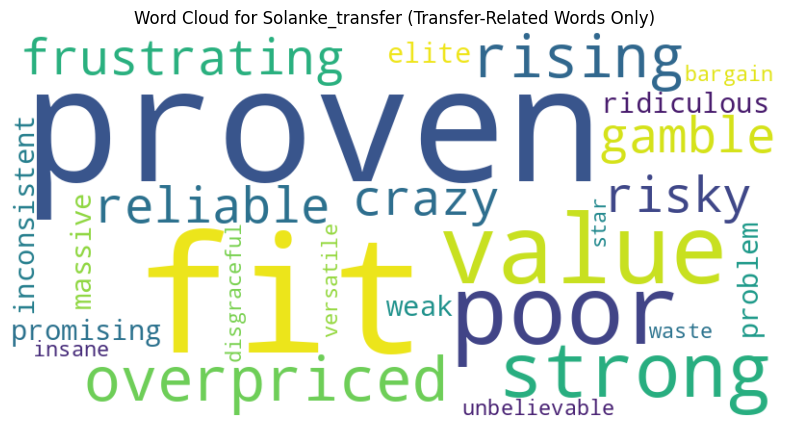


Top 10 TF-IDF words for Yoro_transfer:
value: 0.5570
crazy: 0.3301
proven: 0.2888
fit: 0.2888
problem: 0.2888
poor: 0.2682
ridiculous: 0.2063
talented: 0.1857
insane: 0.1857
bargain: 0.1444


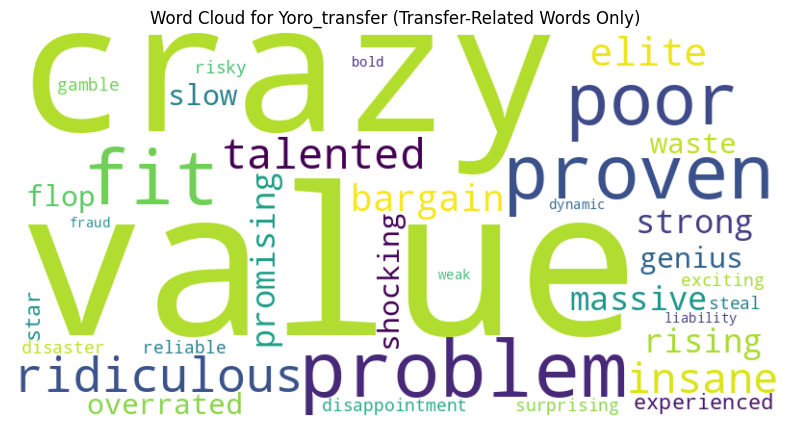

In [73]:
# Define the lists of words
transfer_related_words = [
    "star", "talented", "exceptional", "promising", "rising", "skilled", 
    "proven", "versatile", "strong", "reliable", "world-class", "elite", 
    "experienced", "dynamic", "clutch", "outstanding", "fit", "bargain", 
    "steal", "genius", "value", "flop", "overrated", "risky", "gamble", 
    "injury-prone", "washed", "overpriced", "liability", "inconsistent", 
    "slow", "weak", "unfit", "bust", "disappointment", "problem", "poor", 
    "outdated", "fraud", "disaster", "waste", "exciting", "shocking", 
    "controversial", "surprising", "heartbreaking", "frustrating", "thrilling",
    "emotional", "dramatic", "unbelievable", "disgraceful", "insane", 
    "ridiculous", "crazy", "unexpected", "massive", "bold", "questionable",
    "regretful", "heated"
]

comprehensive_ignore_words = [
    "the", "a", "an", "and", "but", "or", "nor", "for", "yet", "so", 
    "in", "on", "at", "by", "with", "about", "against", "between", "into", 
    "through", "during", "before", "after", "over", "under", "to", "from", 
    "up", "down", "out", "off", "of", "like", "i", "you", "he", "she", 
    "it", "we", "they", "me", "him", "her", "us", "them", "my", "your", 
    "his", "its", "our", "their", "mine", "yours", "hers", "theirs", "is", 
    "was", "are", "were", "will", "would", "should", "could", "has", 
    "have", "had", "do", "does", "did", "can", "may", "might", "am", "be", 
    "being", "been", "if", "then", "there", "here", "this", "that", "these", 
    "those", "such", "as", "not", "very", "much", "many", "some", "any", 
    "few", "more", "most", "all", "just", "only", "now", "well", "even", 
    "though", "also", "back", "season", "players", "player"
]

def calculate_tfidf_and_output_with_filters(dataframes, ignore_words=None, top_n=10):
    tfidf_output = {}

    for name, df in dataframes.items():
        # Combine all comments into a single document for the player
        combined_comments = ' '.join(df['comments'].fillna('')).lower()

        if not combined_comments.strip():
            print(f"No valid comments available for {name}. Skipping.")
            continue

        # Remove ignored words from the combined comments
        filtered_comments = ' '.join(
            word for word in combined_comments.split() 
            if word not in comprehensive_ignore_words
        )

        # Use TfidfVectorizer to calculate TF-IDF
        vectorizer = TfidfVectorizer(stop_words='english', vocabulary=transfer_related_words, max_features=100)
        tfidf_matrix = vectorizer.fit_transform([filtered_comments])  # Treat as a single document
        feature_names = vectorizer.get_feature_names_out()
        tfidf_scores = {feature_names[i]: tfidf_matrix[0, i] for i in range(len(feature_names))}

        # Sort by TF-IDF score
        sorted_tfidf = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)
        
        # Store the top N words
        tfidf_output[name] = sorted_tfidf[:top_n]

        # Print top N TF-IDF words for the player
        print(f"\nTop {top_n} TF-IDF words for {name}:")
        for word, score in tfidf_output[name]:
            print(f"{word}: {score:.4f}")
        
        # Generate word cloud excluding ignored words and non-transfer-related words
        wordcloud_text = ' '.join(
            word for word in filtered_comments.split() if word in transfer_related_words
        )
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for {name} (Transfer-Related Words Only)")
        plt.show()    


    return tfidf_output

tfidf_output = calculate_tfidf_and_output_with_filters(dataframes, ignore_words=[], top_n=10)
